In [18]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [20]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [21]:
df.shape

(100, 3)

In [22]:
df.head()

,feature1,feature2,target
0,-0.212809,0.109240,63.929997
1,-0.008798,0.567533,10.762654
2,-0.686749,-0.527316,-95.905944
3,-0.313954,-0.568993,-36.500508
4,1.052882,0.153389,96.023029


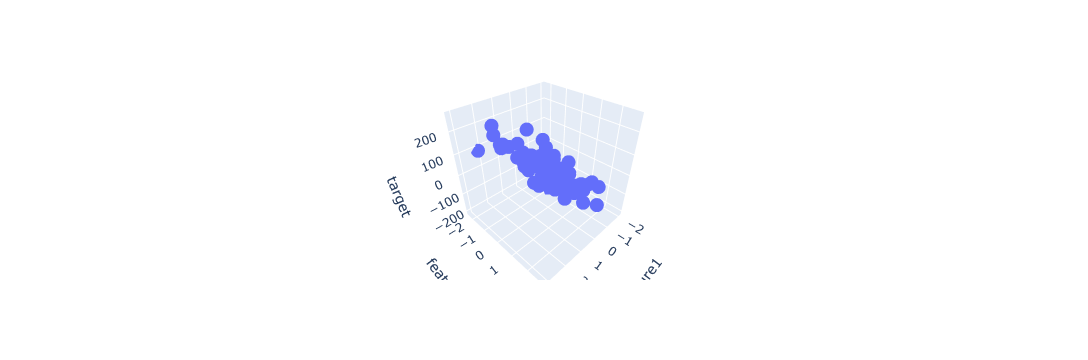

In [23]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 41.18315677582076
MSE 2755.8900145879606
R2 score 0.7332915559989529


In [30]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

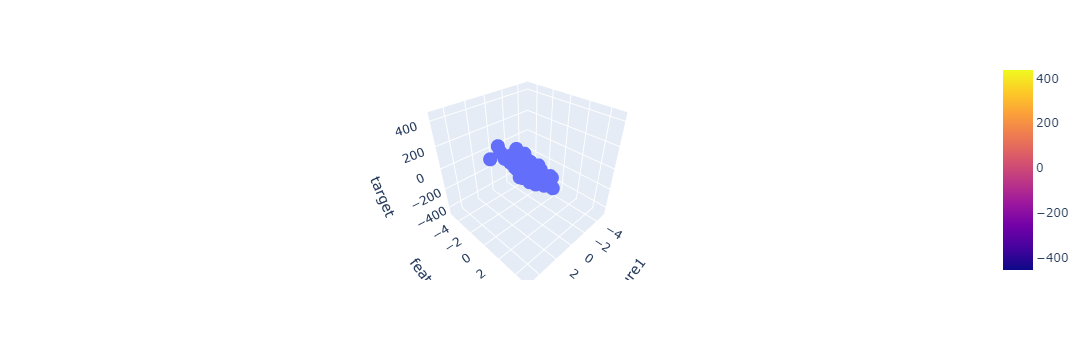

In [31]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [32]:
lr.coef_

array([84.38462361,  4.99316345])

In [33]:
lr.intercept_

-9.370492874434927